In [1]:
import numpy as np
print("Library Imported!!")

Library Imported!!


In [2]:
!pip install missingno


In [3]:
import missingno as msno

In [4]:
import matplotlib.pyplot as plt


In [5]:
import seaborn as sns


In [6]:
import pandas as pd

In [7]:
import warnings

In [8]:
pip install lazypredict


In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [10]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

In [11]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.model_selection import KFold
import optuna

In [13]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combined_df = pd.concat([train_df,test_df],axis=0)

In [14]:
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train_df.shape


(1460, 81)

In [16]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
train_dtype = train_df.dtypes


In [18]:
train_dtype.value_counts()


object     43
int64      35
float64     3
dtype: int64

In [19]:
train_df.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

<Axes: >

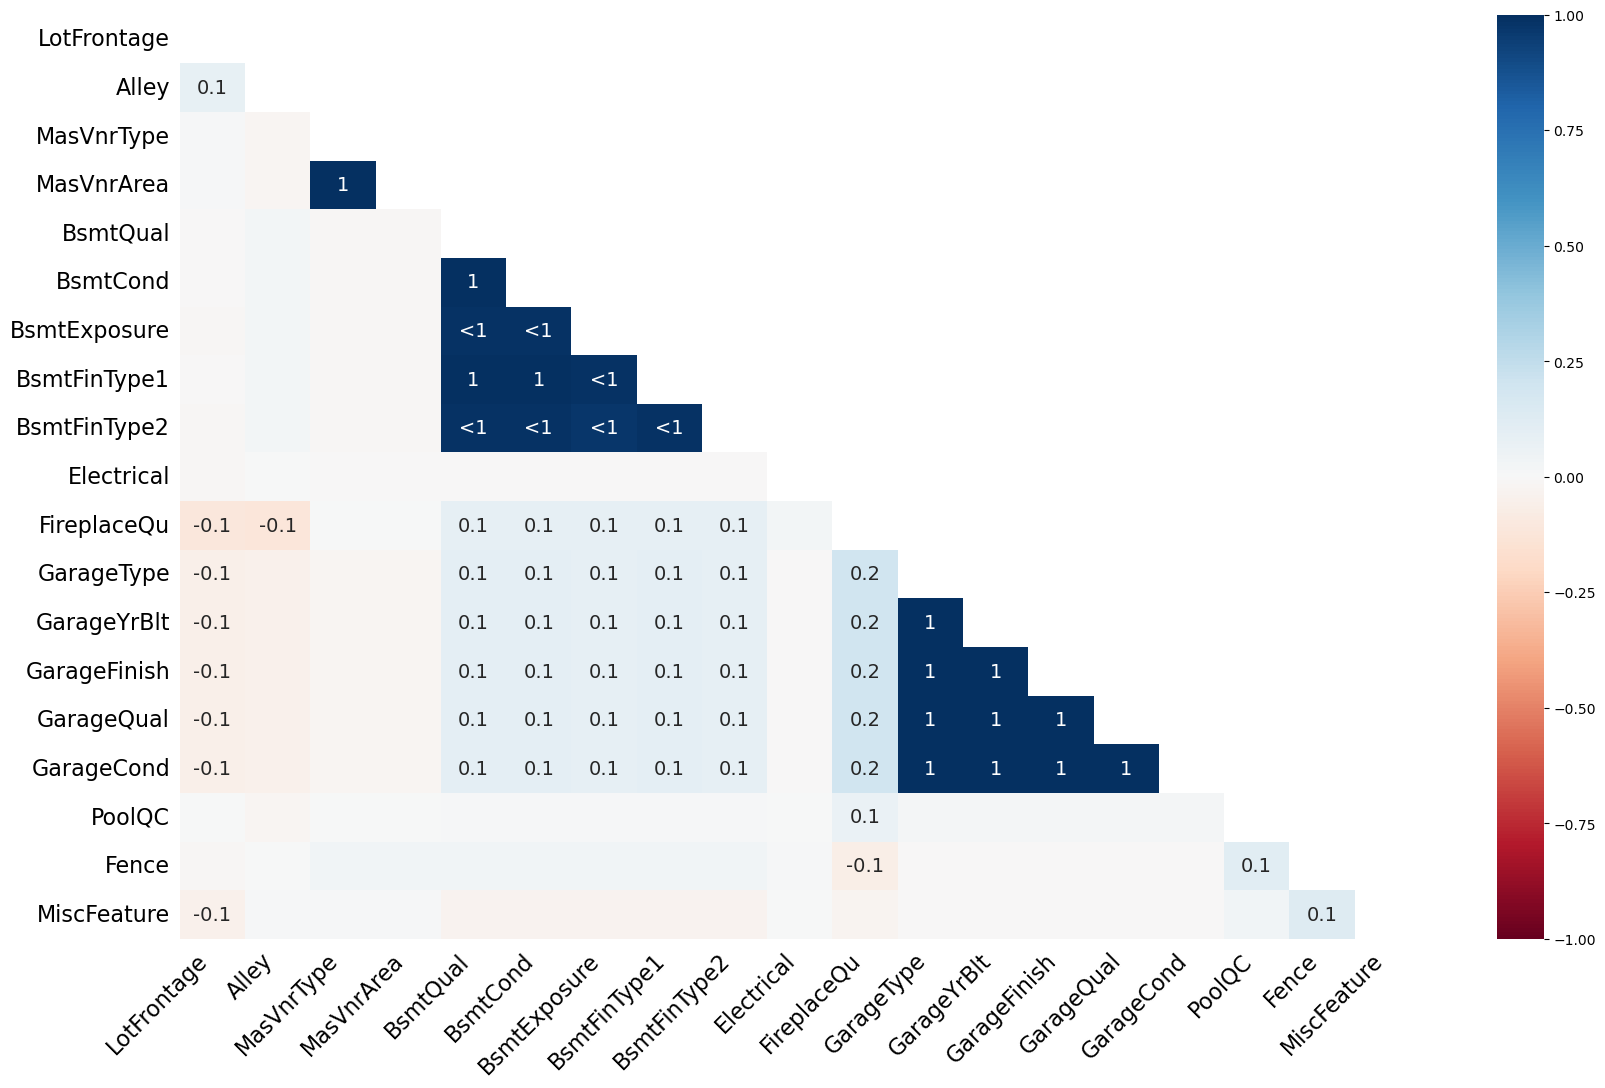

In [20]:
msno.heatmap(train_df)

In [21]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [22]:
test_dtype = test_df.dtypes
test_dtype.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [24]:
test_df.shape

(1459, 80)

In [25]:
test_df.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

<Axes: >

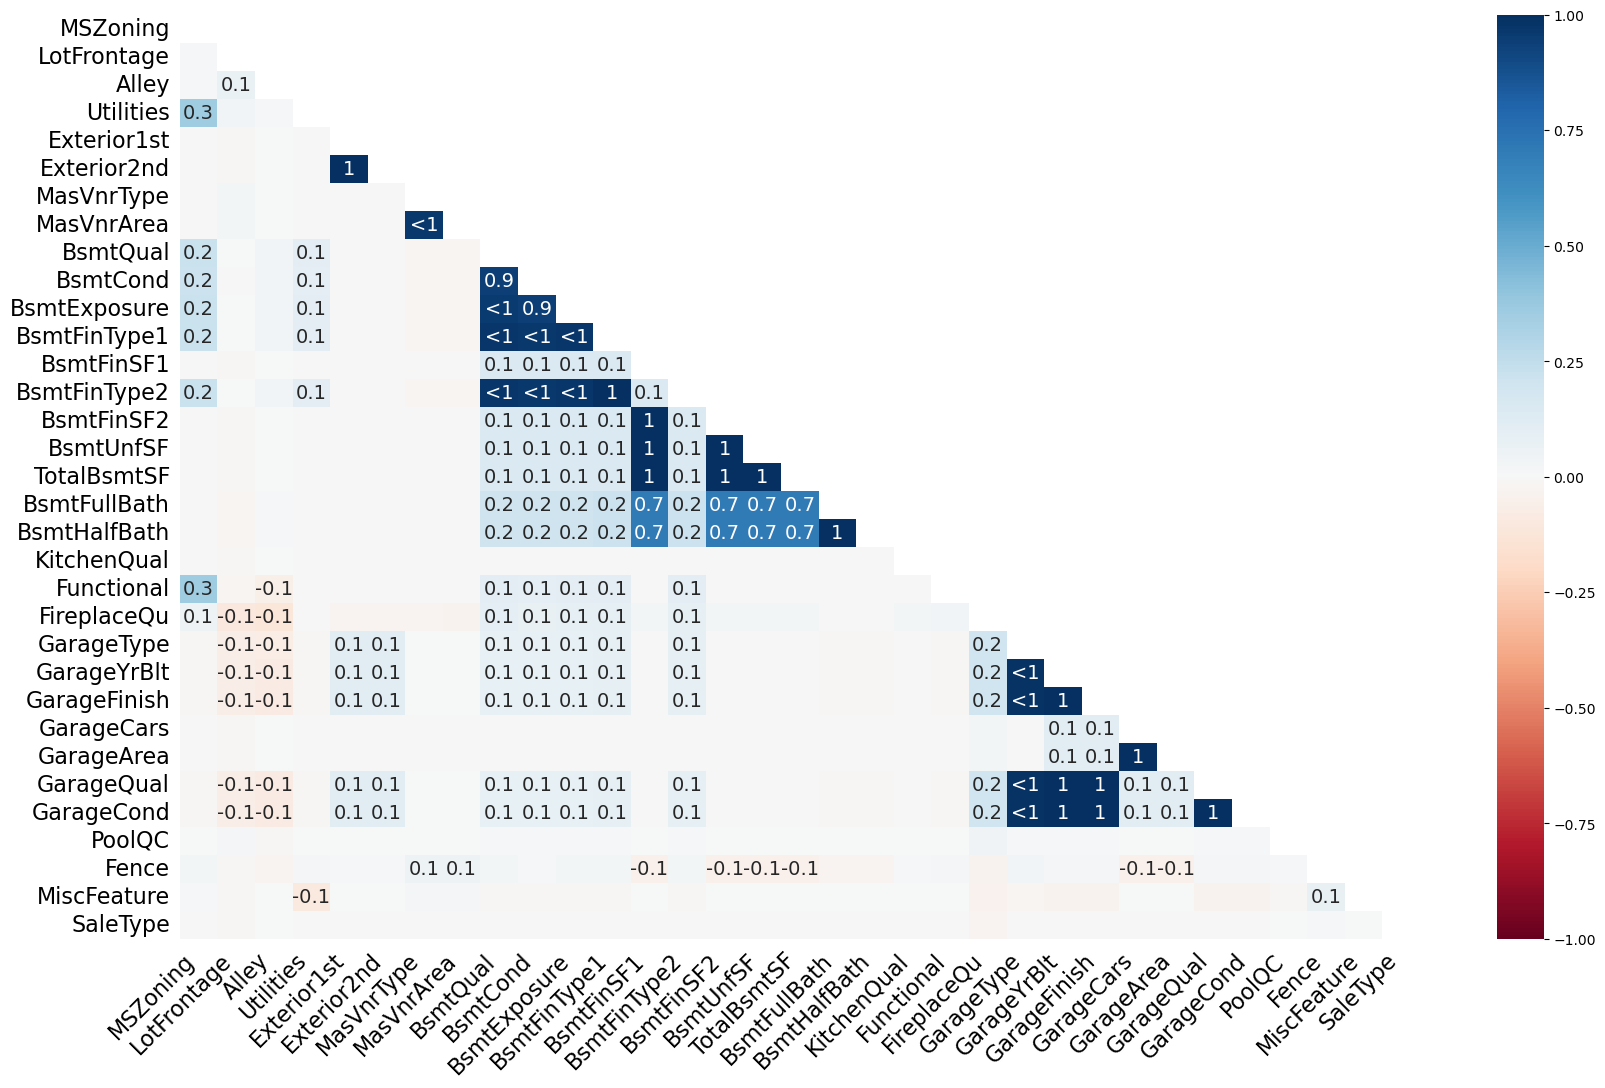

In [26]:
msno.heatmap(test_df)

In [27]:
trn_dtype = train_dtype.drop('SalePrice')
trn_dtype.compare(test_dtype)

,self,other
BsmtFinSF1,int64,float64
BsmtFinSF2,int64,float64
BsmtUnfSF,int64,float64
TotalBsmtSF,int64,float64
BsmtFullBath,int64,float64
BsmtHalfBath,int64,float64
GarageCars,int64,float64
GarageArea,int64,float64


In [28]:
test_df["TotalBsmtSF"].head()

0    882.00
1   1329.00
2    928.00
3    926.00
4   1280.00
Name: TotalBsmtSF, dtype: float64

In [29]:
null_train = train_df.isnull().sum()
null_test = test_df.isnull().sum()
null_train = null_train.drop('SalePrice')
null_comp_df = null_train.compare(null_test).sort_values(['self'],ascending = [False])
null_comp_df 

,self,other
PoolQC,1453.00,1456.00
MiscFeature,1406.00,1408.00
Alley,1369.00,1352.00
Fence,1179.00,1169.00
FireplaceQu,690.00,730.00
LotFrontage,259.00,227.00
GarageType,81.00,76.00
GarageCond,81.00,78.00
GarageYrBlt,81.00,78.00
GarageFinish,81.00,78.00


In [30]:
numerical_features = [col for col in train_df.columns if train_df[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(train_df[col].unique()) < 25 and col not in ['Id']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['Id']]
categorical_features = [col for col in train_df.columns if train_df[col].dtype == 'O']

print("Total Number of Numerical Columns : ",len(numerical_features))
print("Number of discrete features : ",len(discrete_features))
print("Number of continuous features are : ", len(continuous_features))
print("Number of categorical features : ",len(categorical_features))

Total Number of Numerical Columns :  38
Number of discrete features :  18
Number of continuous features are :  19
Number of categorical features :  43


In [31]:
combined_df["Label"] = "test"
combined_df["Label"][:1460] = "train"

In [ ]:
null_features_numerical = [col for col in combined_df.columns if combined_df[col].isnull().sum() > 0 and col not in categorical_features]
plt.figure(figsize=(30,20))
sns.set()

warnings.simplefilter("ignore")
for i,var in enumerate(null_features_numerical):
  plt.subplot(4,3,i+1)
  sns.distplot(combined_df[var],bins=20,kde_kws={'linewidth':3,'color':'red'},label="original")
  sns.distplot(combined_df[var],bins=20,kde_kws={'linewidth':2,'color':'yellow'},label="mean")

<Axes: >

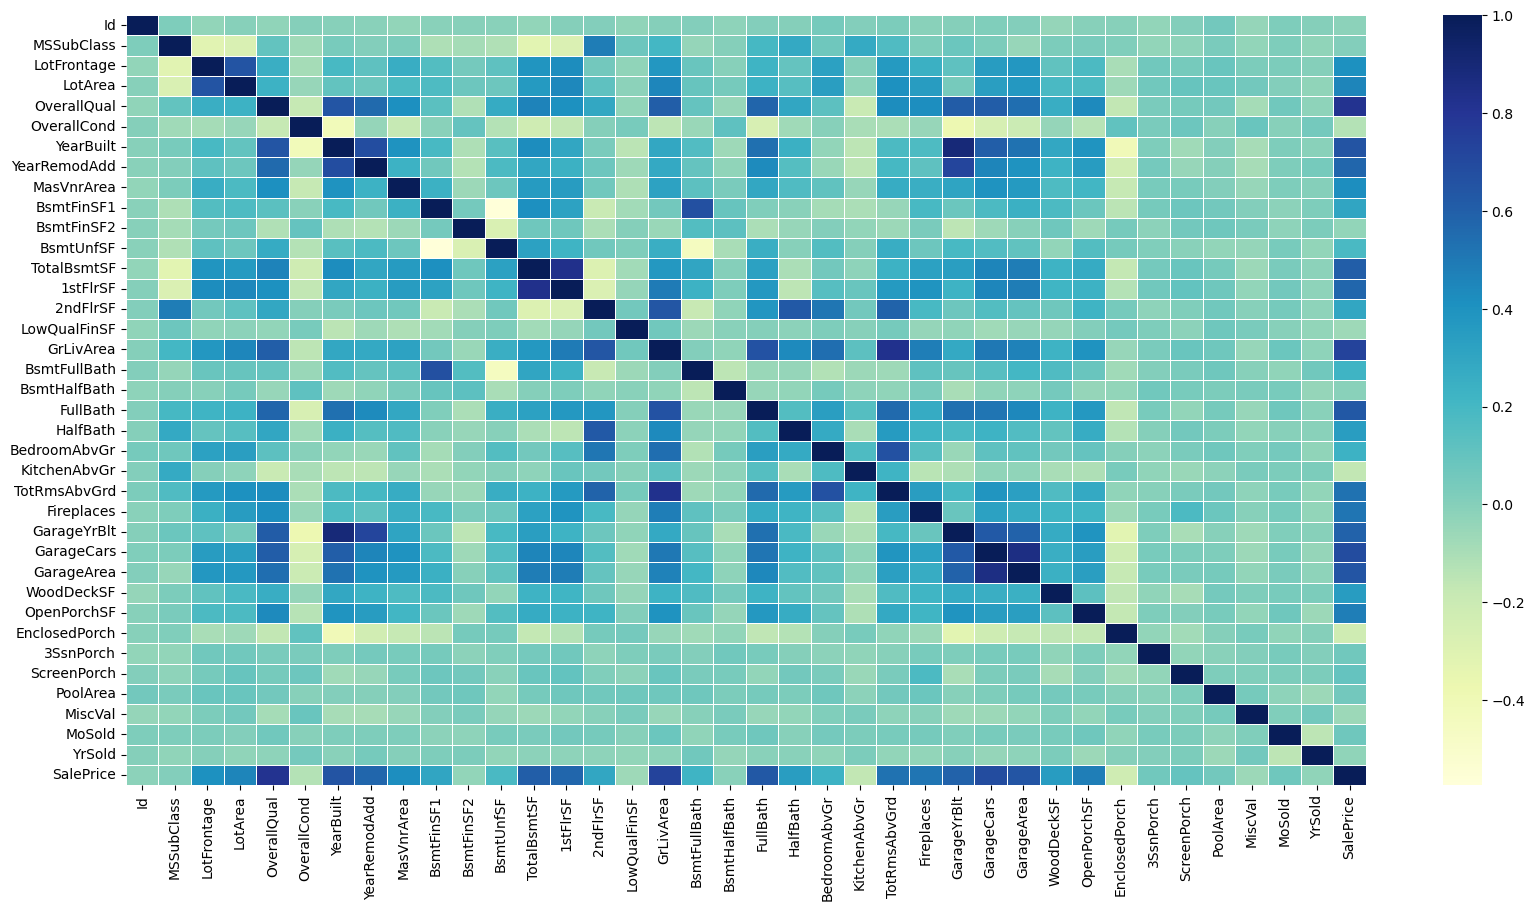

In [33]:
training_corr = train_df.corr(method='spearman')
plt.figure(figsize=(20,10))
sns.heatmap(training_corr, cmap="YlGnBu", linewidths=.5)

In [34]:
# Selecting relevant features
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']
train_df = train_df[selected_features]
test_df = test_df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]



In [35]:
# Handle missing values (simple example, in practice this might need to be more sophisticated)
train_df = train_df.dropna()
test_df = test_df.fillna(0)



In [36]:
# Separate features and target variable
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']
X_test = test_df



In [37]:
from sklearn.preprocessing import StandardScaler

In [39]:
from sklearn.linear_model import LinearRegression


In [40]:
# Normalize/Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train-Test split for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


# Linear Regression model
model = LinearRegression()
model.fit(X_train_split, y_train_split)


LinearRegression()

In [44]:
# Predictions on test set
y_test_pred = model.predict(X_test)

In [45]:
# Save the predictions for the test set
test_df['SalePrice'] = y_test_pred
test_df['Id'] = pd.read_csv('test.csv')['Id']
test_df[['Id', 'SalePrice']].to_csv('test_predictions.csv', index=False)



In [46]:
# Summary of results
print(test_df[['Id', 'SalePrice']].head())


     Id  SalePrice
0  1461  121957.05
1  1462  140103.81
2  1463  202097.67
3  1464  199506.45
4  1465  192657.40
